In [1]:
# Description: LDA model for topic modeling

import os
import pandas as pd
import numpy as np
file_path = "../data/"

data = pd.read_csv(file_path+"processed_data.csv")

In [2]:
# Get the tokens

data["tokens"] = data["tokens"].map(lambda x: str(x).split(","))


In [3]:
# Create a dictionary from ‘tokens’ containing the number of times a word appears in the training set.

from gensim import corpora

text_data = data["tokens"]
dictionary = corpora.Dictionary(text_data)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in text_data]


In [4]:
from gensim.models import KeyedVectors
from gensim.models import word2vec
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from datetime import datetime


In [5]:

topics = []
score = []
time=[]

# Load pre-trained Word2Vec model for Tamil language

model_path = file_path+"cc.ta.300.vec.gz"

# Load vectors directly from the file

w2v_model = KeyedVectors.load_word2vec_format(model_path)



In [6]:


# Create a LDA model for different number of topic numbers

for i in range(15,115,10):
   print("Number of topics: ",i)
   start_time = datetime.now()
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   end_time = datetime.now()
   time_taken = datetime.now() - start_time
   # Compute Coherence Score
   
   cm = CoherenceModel(model=lda_model, texts = data['tokens'], 
corpus=corpus, dictionary=dictionary, 
coherence='c_w2v',keyed_vectors=w2v_model)   
   topics.append(i)
   time.append(time_taken)
   score.append(cm.get_coherence())

Number of topics:  15
Number of topics:  25
Number of topics:  35
Number of topics:  45
Number of topics:  55
Number of topics:  65
Number of topics:  75
Number of topics:  85
Number of topics:  95
Number of topics:  105


In [7]:
scores=pd.DataFrame({"topics":topics,"score":score,"time":time})

scores

,topics,score,time
0,15,0.501818,0 days 00:00:08.071373
1,25,0.487444,0 days 00:00:08.561901
2,35,0.477043,0 days 00:00:08.281388
3,45,0.473895,0 days 00:00:08.535365
4,55,0.476198,0 days 00:00:09.691816
5,65,0.476002,0 days 00:00:09.124147
6,75,0.480642,0 days 00:00:09.151292
7,85,0.485380,0 days 00:00:09.066637
8,95,0.490923,0 days 00:00:09.221205
9,105,0.490659,0 days 00:00:09.188960


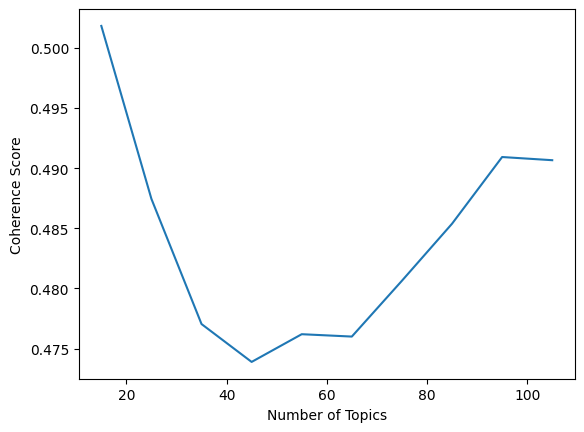

In [8]:
# Plot the coherence score for different number of topics

import matplotlib.pyplot as plt
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [9]:
# get score for 15 topics

score_15=scores[scores["topics"]==15]["score"].values[0]

# Create a LDA model for 15 topics

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=15, workers = 4, passes=10, random_state=100)


In [10]:
print("Coherence score for 15 topics: ",score_15)

Coherence score for 15 topics:  0.5018185


In [11]:
coherences=['u_mass', 'c_v', 'c_uci', 'c_npmi']
lda_scores=[]
for coherence in coherences:
    cm = CoherenceModel(model=lda_model,
                                 texts=data['tokens'],
                                 corpus=corpus,
                                 dictionary=dictionary,
                                    coherence=coherence)
    coherence_score = cm.get_coherence()
    lda_scores.append(coherence_score)

#print scores

for i in range(len(coherences)):
    print(coherences[i],lda_scores[i])


u_mass -9.863802668615865
c_v 0.3957378299818658
c_uci -4.745222247584867
c_npmi -0.13003139043838194


In [12]:
# Visualize the topics

import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_viz, 'lda.html')

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
